In [2]:
import pandas as pd
import locale
import glob

# Load data

In [20]:
def load_visitor_counts_data(
    data_folder: str,
):

    raw_visitor_counts = pd.concat([pd.read_csv(
        file, 
        skiprows=2, 
        index_col=["Time"]
    ) for file in glob.glob(f"{data_folder}/*.csv")])
    
    # Drop last empty column
    visitor_counts = raw_visitor_counts.drop(columns=["Unnamed: 96"])

    return visitor_counts

visitor_counts = load_visitor_counts_data(data_folder="data")

# Preprocess data

In [21]:
def parse_datetime_index(
        df: pd.DataFrame,
    ) -> pd.DataFrame:
    """Parse the datetime index of the dataframe."""

    # Set the locale to German
    locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')

    return df.set_index(
        pd.to_datetime(df.index, format="%d. %b. %Y %H:%M", errors='coerce')
)

visitor_counts = parse_datetime_index(visitor_counts)


In [22]:
print(visitor_counts.index.isnull().sum())

20664


In [21]:
visitor_counts.columns

Index(['Bayerisch Eisenstein IN', 'Bayerisch Eisenstein OUT',
       'Bayerisch Eisenstein Fußgänger IN',
       'Bayerisch Eisenstein Fußgänger OUT',
       'Bayerisch Eisenstein Fahrräder IN',
       'Bayerisch Eisenstein Fahrräder OUT', 'Brechhäuslau IN',
       'Brechhäuslau OUT', 'Brechhäuslau Fußgänger IN',
       'Brechhäuslau Fußgänger OUT', 'Bucina IN', 'Bucina OUT',
       'Bucina_Multi OUT', 'Bucina_Multi Fußgänger IN',
       'Bucina_Multi Fahrräder IN', 'Bucina_Multi Fahrräder OUT',
       'Bucina_Multi Fußgänger OUT', 'Deffernik IN', 'Deffernik OUT',
       'Deffernik Fahrräder IN', 'Deffernik Fahrräder OUT',
       'Deffernik Fußgänger IN', 'Deffernik Fußgänger OUT',
       'Diensthüttenstraße Fußgänger IN', 'Diensthüttenstraße Fußgänger OUT',
       'Felswandergebiet IN', 'Felswandergebiet OUT', 'Ferdinandsthal IN',
       'Ferdinandsthal OUT', 'Fredenbrücke Fußgänger IN',
       'Fredenbrücke Fußgänger OUT', 'Gfäll Fußgänger IN',
       'Gfäll Fußgänger OUT', 'Gsenget 

In [14]:
print(visitor_counts.head())

                     Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
Time                                                                     
2018-01-01 00:00:00                      NaN                       NaN   
2018-01-01 01:00:00                      NaN                       NaN   
2018-01-01 02:00:00                      NaN                       NaN   
2018-01-01 03:00:00                      NaN                       NaN   
2018-01-01 04:00:00                      NaN                       NaN   

                     Bayerisch Eisenstein Fußgänger IN  \
Time                                                     
2018-01-01 00:00:00                                NaN   
2018-01-01 01:00:00                                NaN   
2018-01-01 02:00:00                                NaN   
2018-01-01 03:00:00                                NaN   
2018-01-01 04:00:00                                NaN   

                     Bayerisch Eisenstein Fußgänger OUT  \
Time           

In [15]:
print(visitor_counts.describe())

       Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
count             13569.000000              13569.000000   
mean                  0.494657                  0.590979   
std                   1.525381                  1.775379   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                  37.000000                 28.000000   

       Bayerisch Eisenstein Fußgänger IN  Bayerisch Eisenstein Fußgänger OUT  \
count                       13569.000000                        13569.000000   
mean                            0.418970                            0.494878   
std                             1.364323                            1.549638   
min                             0.000000                            0.000000   
25%                             0.000000                   

In [18]:
print(visitor_counts.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61344 entries, 2018-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 95 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bayerisch Eisenstein IN                            13569 non-null  float64
 1   Bayerisch Eisenstein OUT                           13569 non-null  float64
 2   Bayerisch Eisenstein Fußgänger IN                  13569 non-null  float64
 3   Bayerisch Eisenstein Fußgänger OUT                 13569 non-null  float64
 4   Bayerisch Eisenstein Fahrräder IN                  13569 non-null  float64
 5   Bayerisch Eisenstein Fahrräder OUT                 13569 non-null  float64
 6   Brechhäuslau IN                                    59911 non-null  float64
 7   Brechhäuslau OUT                                   59911 non-null  float64
 8   Brechhäuslau Fußgänger IN                          

In [16]:
# Check for missing values
print(visitor_counts.isnull().sum())

Bayerisch Eisenstein IN               47775
Bayerisch Eisenstein OUT              47775
Bayerisch Eisenstein Fußgänger IN     47775
Bayerisch Eisenstein Fußgänger OUT    47775
Bayerisch Eisenstein Fahrräder IN     47775
                                      ...  
Waldhausreibe Channel 2 OUT           61343
Waldspielgelände_1 IN                 17729
Waldspielgelände_1 OUT                17729
Wistlberg Fußgänger IN                51468
Wistlberg Fußgänger OUT               51468
Length: 95, dtype: int64


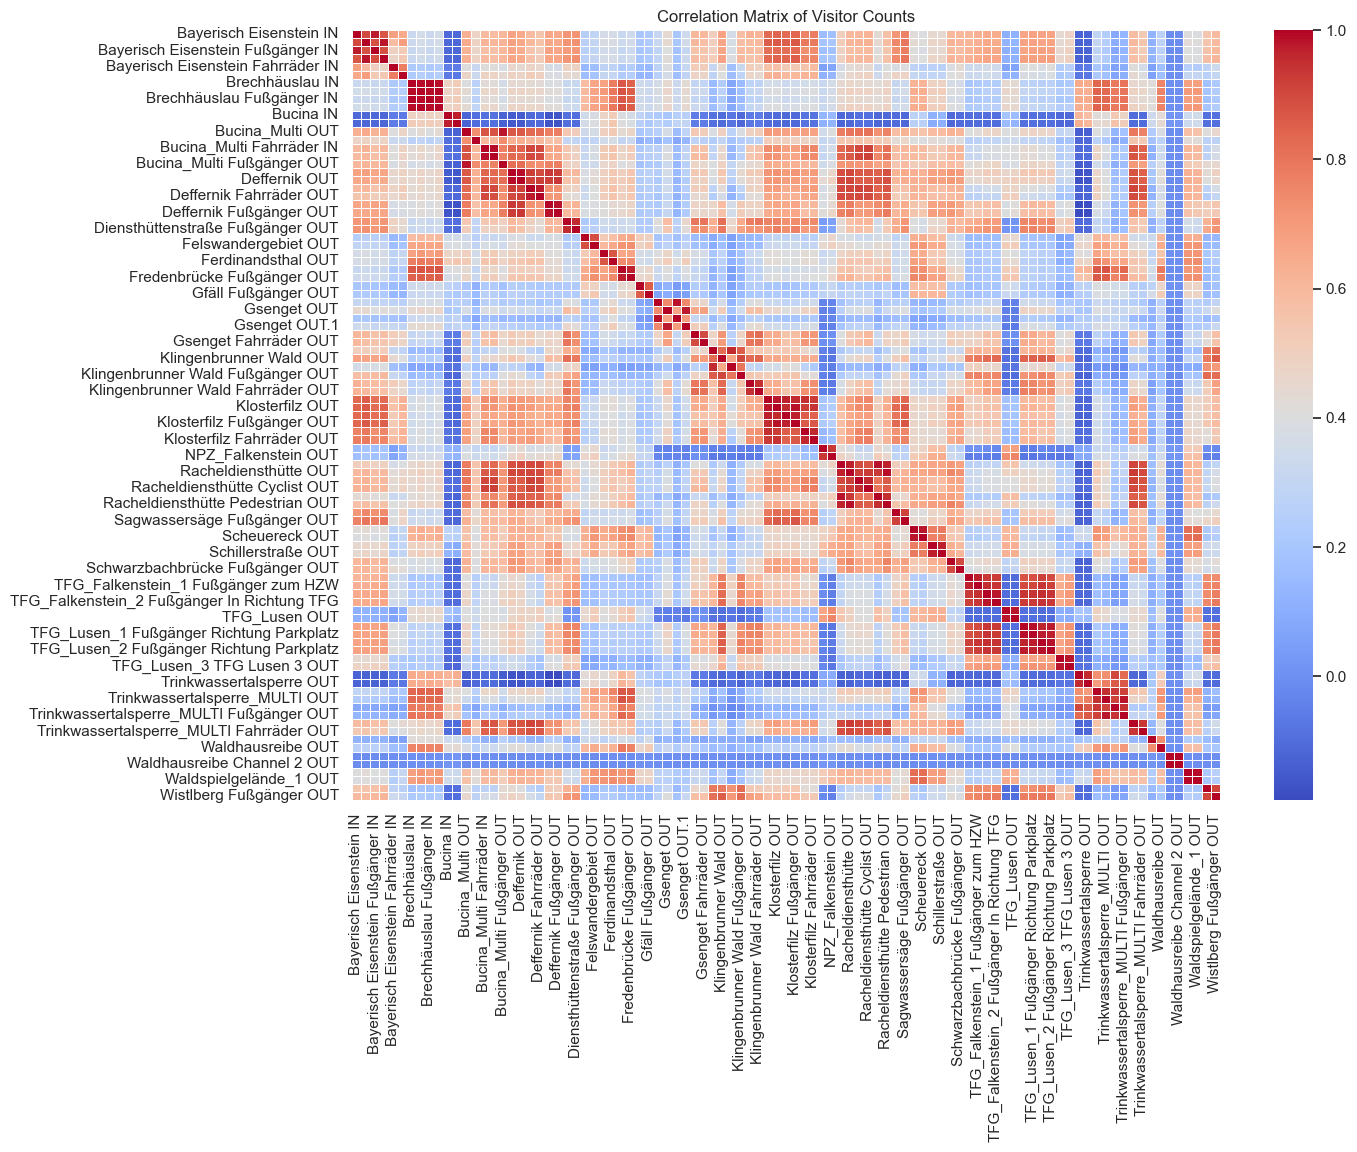

In [27]:
# Plot heatmap for visitor counts
plt.figure(figsize=(14, 10))
sns.heatmap(daily_counts.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Visitor Counts')
plt.show()


# Analyzing the timespan for which data is available for each column

In [10]:


def check_data_availability(df):
    # Iterate through each column
    for col in df.columns:
        # Get the total number of NaN values in the column
        num_nan = df[col].isna().sum()

        # Get the date range (start and end) where data is available
        non_nan_data = df[col].dropna()

        if not non_nan_data.empty:
            start_date = non_nan_data.index.min()
            end_date = non_nan_data.index.max()
        else:
            start_date, end_date = None, None

        # Print the results
        print(f"Column: {col}")
        print(f" - Start Date: {start_date}")
        print(f" - End Date: {end_date}")
        print(f" - Number of NaN values: {num_nan}")
        print(f" - Total number of entries: {len(df)}")
        print("\n")

# Assuming visitor_counts is your DataFrame with the datetime index
visitor_counts.index = pd.to_datetime(visitor_counts.index)

# Call the function to check data availability
check_data_availability(visitor_counts)


Column: Bayerisch Eisenstein IN
 - Start Date: 2022-08-01 00:00:00
 - End Date: 2023-12-31 23:00:00
 - Number of NaN values: 47775
 - Total number of entries: 61344


Column: Bayerisch Eisenstein OUT
 - Start Date: 2022-08-01 00:00:00
 - End Date: 2023-12-31 23:00:00
 - Number of NaN values: 47775
 - Total number of entries: 61344


Column: Bayerisch Eisenstein Fußgänger IN
 - Start Date: 2022-08-01 00:00:00
 - End Date: 2023-12-31 23:00:00
 - Number of NaN values: 47775
 - Total number of entries: 61344


Column: Bayerisch Eisenstein Fußgänger OUT
 - Start Date: 2022-08-01 00:00:00
 - End Date: 2023-12-31 23:00:00
 - Number of NaN values: 47775
 - Total number of entries: 61344


Column: Bayerisch Eisenstein Fahrräder IN
 - Start Date: 2022-08-01 00:00:00
 - End Date: 2023-12-31 23:00:00
 - Number of NaN values: 47775
 - Total number of entries: 61344


Column: Bayerisch Eisenstein Fahrräder OUT
 - Start Date: 2022-08-01 00:00:00
 - End Date: 2023-12-31 23:00:00
 - Number of NaN value

In [8]:
def check_data_availability(df):
    # Initialize lists to store the information
    column_names = []
    start_dates = []
    end_dates = []
    num_nan_values = []
    total_entries = []

    # Iterate through each column
    for col in df.columns:
        column_names.append(col)
        
        # Get the total number of NaN values in the column
        num_nan = df[col].isna().sum()
        num_nan_values.append(num_nan)

        # Get the date range (start and end) where data is available
        non_nan_data = df[col].dropna()

        if not non_nan_data.empty:
            start_date = non_nan_data.index.min()
            end_date = non_nan_data.index.max()
        else:
            start_date, end_date = None, None

        start_dates.append(start_date)
        end_dates.append(end_date)
        total_entries.append(len(df))

    # Create a DataFrame with the collected information
    data_availability_df = pd.DataFrame({
        'Column': column_names,
        'Start Date': start_dates,
        'End Date': end_dates,
        'Number of NaN Values': num_nan_values,
        'Total Number of Entries': total_entries
    })

    return data_availability_df

# Assuming visitor_counts is your DataFrame with the datetime index
visitor_counts.index = pd.to_datetime(visitor_counts.index)

# Call the function to get the data availability info
data_availability_df = check_data_availability(visitor_counts)

# Define the output Excel file path
output_file_path = os.path.join("data", "data_availability_report.xlsx")

# Save the DataFrame to an Excel file
data_availability_df.to_excel(output_file_path, index=False)

print(f"Data availability report saved to: {output_file_path}")


Data availability report saved to: data\data_availability_report.xlsx


In [8]:
# Define how many columns to print per page
columns_per_page = 15
columns = visitor_counts.columns.tolist()

# Print columns in pages
for i in range(0, len(columns), columns_per_page):
    print(f"Columns {i + 1} to {i + columns_per_page}:")
    print(columns[i:i + columns_per_page])
    print("\n")



Columns 1 to 15:
['Bayerisch Eisenstein IN', 'Bayerisch Eisenstein OUT', 'Bayerisch Eisenstein Fußgänger IN', 'Bayerisch Eisenstein Fußgänger OUT', 'Bayerisch Eisenstein Fahrräder IN', 'Bayerisch Eisenstein Fahrräder OUT', 'Brechhäuslau IN', 'Brechhäuslau OUT', 'Brechhäuslau Fußgänger IN', 'Brechhäuslau Fußgänger OUT', 'Bucina IN', 'Bucina OUT', 'Bucina_Multi OUT', 'Bucina_Multi Fußgänger IN', 'Bucina_Multi Fahrräder IN']


Columns 16 to 30:
['Bucina_Multi Fahrräder OUT', 'Bucina_Multi Fußgänger OUT', 'Deffernik IN', 'Deffernik OUT', 'Deffernik Fahrräder IN', 'Deffernik Fahrräder OUT', 'Deffernik Fußgänger IN', 'Deffernik Fußgänger OUT', 'Diensthüttenstraße Fußgänger IN', 'Diensthüttenstraße Fußgänger OUT', 'Felswandergebiet IN', 'Felswandergebiet OUT', 'Ferdinandsthal IN', 'Ferdinandsthal OUT', 'Fredenbrücke Fußgänger IN']


Columns 31 to 45:
['Fredenbrücke Fußgänger OUT', 'Gfäll Fußgänger IN', 'Gfäll Fußgänger OUT', 'Gsenget IN', 'Gsenget OUT', 'Gsenget IN.1', 'Gsenget OUT.1', 'Gseng

In [15]:
import pandas as pd

# Assuming visitor_counts is your DataFrame
# visitor_counts = pd.read_csv('your_file.csv')  # Example of loading your DataFrame

# List to hold details of each column
column_details = []

# Function to gather details for each column
def gather_column_details(df, col):
    details = {}
    details['Column'] = col
    details['Data Type'] = df[col].dtype
    if pd.api.types.is_numeric_dtype(df[col]):
        details['Min'] = df[col].min()
        details['Max'] = df[col].max()
    else:
        details['Min'] = 'N/A'
        details['Max'] = 'N/A'
    details['Null Values'] = df[col].isnull().sum()
    return details

# Gather details for all columns
for col in visitor_counts.columns:
    column_details.append(gather_column_details(visitor_counts, col))

# Convert the list of details to a DataFrame
details_df = pd.DataFrame(column_details)

# Save the DataFrame to a CSV file
details_df.to_csv('column_details.csv', index=False)

print("Column details have been saved to 'column_details.csv'")


Column details have been saved to 'column_details.csv'


In [14]:
import pandas as pd
import os

# Assuming visitor_counts is your DataFrame
# visitor_counts = pd.read_csv('your_file.csv')  # Example of loading your DataFrame

# List to hold details of each column
column_details = []

# Function to gather details for each column
def gather_column_details(df, col):
    details = {}
    details['Column'] = col
    details['Data Type'] = df[col].dtype
    if pd.api.types.is_numeric_dtype(df[col]):
        details['Min'] = df[col].min()
        details['Max'] = df[col].max()
    else:
        details['Min'] = 'N/A'
        details['Max'] = 'N/A'
    details['Null Values'] = df[col].isnull().sum()
    return details

# Gather details for all columns
for col in visitor_counts.columns:
    column_details.append(gather_column_details(visitor_counts, col))

# Convert the list of details to a DataFrame
details_df = pd.DataFrame(column_details)

# Define the path where the file will be saved
output_dir = "your_desired_directory"  # replace with your desired directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
file_path = os.path.join(output_dir, 'column_details.xlsx')

# Save the DataFrame to an Excel file
details_df.to_excel(file_path, index=False, engine='openpyxl')

print(f"Column details have been saved to '{file_path}'")


Column details have been saved to 'your_desired_directory\column_details.xlsx'


In [46]:
# Extract columns for 'IN' and 'OUT'
in_columns = [col for col in visitor_counts.columns if 'IN' in col]
out_columns = [col for col in visitor_counts.columns if 'OUT' in col]

# Print column names
print("Columns for 'IN':")
print(in_columns)

print("\nColumns for 'OUT':")
print(out_columns)


Columns for 'IN':
['Bayerisch Eisenstein IN', 'Bayerisch Eisenstein Fußgänger IN', 'Bayerisch Eisenstein Fahrräder IN', 'Brechhäuslau IN', 'Brechhäuslau Fußgänger IN', 'Bucina IN', 'Bucina_Multi Fußgänger IN', 'Bucina_Multi Fahrräder IN', 'Deffernik IN', 'Deffernik Fahrräder IN', 'Deffernik Fußgänger IN', 'Diensthüttenstraße Fußgänger IN', 'Felswandergebiet IN', 'Ferdinandsthal IN', 'Fredenbrücke Fußgänger IN', 'Gfäll Fußgänger IN', 'Gsenget IN', 'Gsenget IN.1', 'Gsenget Fahrräder IN', 'Klingenbrunner Wald IN', 'Klingenbrunner Wald Fußgänger IN', 'Klingenbrunner Wald Fahrräder IN', 'Klosterfilz IN', 'Klosterfilz Fußgänger IN', 'Klosterfilz Fahrräder IN', 'NPZ_Falkenstein IN', 'Racheldiensthütte IN', 'Racheldiensthütte Fahrräder IN', 'Racheldiensthütte Pedestrian IN', 'Sagwassersäge Fußgänger IN', 'Scheuereck IN', 'Schillerstraße IN', 'Schwarzbachbrücke Fußgänger IN', 'TFG_Lusen IN', 'TFG_Lusen_3 TFG Lusen 3 IN', 'Trinkwassertalsperre IN', 'Trinkwassertalsperre_MULTI IN', 'Trinkwasserta

In [48]:


# Extract column names for 'IN' and 'OUT'
in_columns = [col for col in visitor_counts.columns if 'IN' in col]
out_columns = [col for col in visitor_counts.columns if 'OUT' in col]

# Count the number of 'IN' and 'OUT' columns
num_in_columns = len(in_columns)
num_out_columns = len(out_columns)

# Identify columns without 'IN' or 'OUT'
other_columns = [col for col in visitor_counts.columns if 'IN' not in col and 'OUT' not in col]
num_other_columns = len(other_columns)

# Print the results
print(f"Total number of 'IN' columns: {num_in_columns}")
print(f"Total number of 'OUT' columns: {num_out_columns}")
print(f"Total number of columns without 'IN' or 'OUT': {num_other_columns}")
print("Columns without 'IN' or 'OUT':")
print(other_columns)


Total number of 'IN' columns: 43
Total number of 'OUT' columns: 44
Total number of columns without 'IN' or 'OUT': 8
Columns without 'IN' or 'OUT':
['TFG_Falkenstein_1 Fußgänger zum Parkplatz', 'TFG_Falkenstein_1 Fußgänger zum HZW', 'TFG_Falkenstein_2 Fußgänger In Richtung Parkplatz', 'TFG_Falkenstein_2 Fußgänger In Richtung TFG', 'TFG_Lusen_1 Fußgänger Richtung TFG', 'TFG_Lusen_1 Fußgänger Richtung Parkplatz', 'TFG_Lusen_2 Fußgänger Richtung Vögel am Waldrand', 'TFG_Lusen_2 Fußgänger Richtung Parkplatz']


In [52]:
print(visitor_counts['TFG_Falkenstein_1 Fußgänger zum Parkplatz'].isnull().sum())

52357


In [39]:

# Define a function to calculate totals for 'IN' and 'OUT' columns
def calculate_totals(df: pd.DataFrame, column_pattern: str) -> pd.Series:
    # Filter columns based on the pattern
    columns = [col for col in df.columns if column_pattern in col]
    return df[columns].resample('D').sum().sum(axis=1)

# Calculate daily totals for 'IN' and 'OUT'
daily_in_counts = calculate_totals(visitor_counts, 'IN')
daily_out_counts = calculate_totals(visitor_counts, 'OUT')

# Calculate weekly totals
weekly_in_counts = daily_in_counts.resample('W').sum()
weekly_out_counts = daily_out_counts.resample('W').sum()

# Calculate monthly totals
monthly_in_counts = daily_in_counts.resample('ME').sum()
monthly_out_counts = daily_out_counts.resample('ME').sum()

# Calculate yearly totals
yearly_in_counts = daily_in_counts.resample('YE').sum()
yearly_out_counts = daily_out_counts.resample('YE').sum()


In [41]:
# Display results
print("Daily IN Counts:")
print(daily_in_counts.head())

print("\nDaily OUT Counts:")
print(daily_out_counts.head())

Daily IN Counts:
Time
2017-01-01    1668.0
2017-01-02     521.0
2017-01-03     641.0
2017-01-04     119.0
2017-01-05     402.0
dtype: float64

Daily OUT Counts:
Time
2017-01-01    2559.0
2017-01-02     638.0
2017-01-03     821.0
2017-01-04     179.0
2017-01-05     232.0
dtype: float64


In [42]:
print("\nMonthly IN Counts:")
print(monthly_in_counts.head())

print("\nMonthly OUT Counts:")
print(monthly_out_counts.head())


Monthly IN Counts:
Time
2017-01-31    15143.0
2017-02-28    14321.0
2017-03-31        0.0
2017-04-30    20200.0
2017-05-31        0.0
Freq: ME, dtype: float64

Monthly OUT Counts:
Time
2017-01-31    18196.0
2017-02-28    16671.0
2017-03-31        0.0
2017-04-30    22797.0
2017-05-31        0.0
Freq: ME, dtype: float64


In [43]:
print("\nWeekly IN Counts:")
print(weekly_in_counts.head())

print("\nWeekly OUT Counts:")
print(weekly_out_counts.head())


Weekly IN Counts:
Time
2017-01-01    1668.0
2017-01-08    3919.0
2017-01-15    1905.0
2017-01-22    2767.0
2017-01-29    4393.0
Freq: W-SUN, dtype: float64

Weekly OUT Counts:
Time
2017-01-01    2559.0
2017-01-08    4619.0
2017-01-15    2104.0
2017-01-22    3381.0
2017-01-29    5034.0
Freq: W-SUN, dtype: float64


In [44]:
print("\nYearly IN Counts:")
print(yearly_in_counts.head())

print("\nYearly OUT Counts:")
print(yearly_out_counts.head())


Yearly IN Counts:
Time
2017-12-31    146812.0
2018-12-31    183799.0
2019-12-31    230601.0
2020-12-31    299045.0
2021-12-31    298186.0
Freq: YE-DEC, dtype: float64

Yearly OUT Counts:
Time
2017-12-31    160423.0
2018-12-31    186867.0
2019-12-31    229283.0
2020-12-31    309174.0
2021-12-31    334713.0
Freq: YE-DEC, dtype: float64


In [58]:
# Convert column names to lowercase
lowercase_columns = [col.lower() for col in visitor_counts.columns]

# Check if the lowercase version of 'Wistlberg' is in the lowercase columns list
if 'wistlberg' in lowercase_columns:
    print('yes')
else:
    print('no')


no
